In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

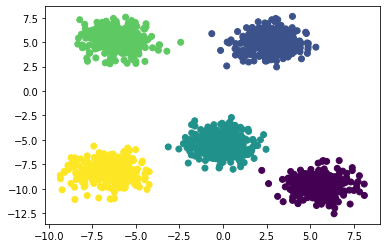

In [49]:
X,y=make_blobs(n_samples=1500,n_features=2,centers=5,random_state=10)
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [52]:
k=5
colors=['violet','blue','green','yellow','red']
clusters={}
for i in range(k):
    center=10*((2*np.random.random(X.shape[1],))-1)
    points=[]
    cluster={
        'center':center,
        'points':points,
        'color':colors[i]
    }
    clusters[i]=cluster

In [53]:
def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [54]:
def AssignPointsToClusters(clusters):
    for i in range(X.shape[0]):
        dist=[]
        x=X[i]
        for j in range(k):
            d=distance(x,clusters[j]['center'])
            dist.append(d)
        index=np.argmin(dist)
        clusters[index]['points'].append(x)

In [55]:
def UpdateClusterCenter(clusters):
    for i in range(k):
        pts=np.array(clusters[i]['points'])
        if pts.shape[0]>0:
            m=pts.mean(axis=0)
            clusters[i]['center']=m
            clusters[i]['points']=[]

In [56]:
def PlotClusters(clusters):
    for i in range(k):
        pts=np.array(clusters[i]['points'])
        try:
            plt.scatter(pts[:,0],pts[:,1],color=clusters[i]['color'])
        except:
            pass
        plt.scatter(clusters[i]['center'][0],clusters[i]['center'][1],color='black',marker='*')

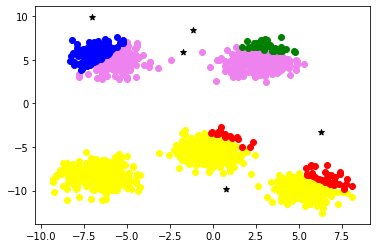

In [57]:
AssignPointsToClusters(clusters)
PlotClusters(clusters)

In [58]:
count=1
while count<300:
    AssignPointsToClusters(clusters)
    UpdateClusterCenter(clusters)
    count+=1

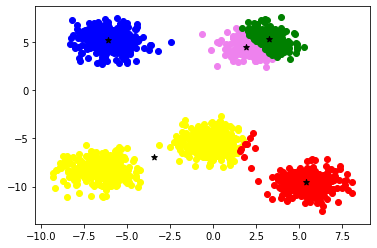

In [59]:
AssignPointsToClusters(clusters)
PlotClusters(clusters)

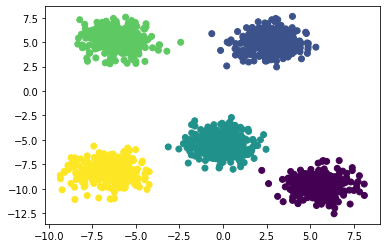

In [60]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

# By sklearn KMeans and DBSCAN

In [61]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

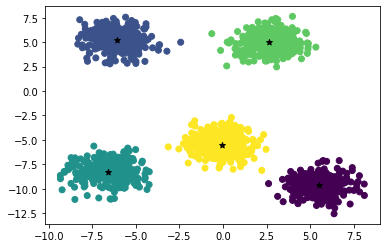

In [62]:
km=KMeans(n_clusters=k)
km.fit(X)
centers=km.cluster_centers_
label=km.labels_
plt.scatter(X[:,0],X[:,1],c=label)
plt.scatter(centers[:,0],centers[:,1],marker='*',color='black')

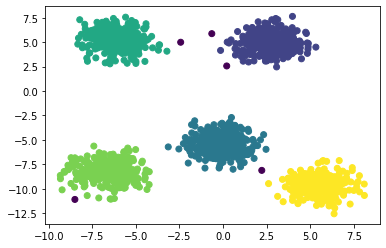

In [67]:
dbs=DBSCAN(eps=1,min_samples=5)
dbs.fit(X)
ybs=dbs.fit_predict(X)
plt.scatter(X[:,0],X[:,1],c=ybs)
plt.show()